In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install faker

In [3]:
import pandas as pd
import random
from faker import Faker
fake = Faker('id_ID')  # Lokal Indonesia

# Daftar pilihan untuk beberapa kolom
merk_hp = ['Samsung', 'iPhone', 'Xiaomi', 'Oppo', 'Vivo', 'Realme', 'Asus']
lokasi_list = ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Yogyakarta', 'Semarang']
tipe_lokasi = ['Mall', 'Kampus', 'Kantor', 'Stasiun', 'Kafe', 'Perpustakaan']

# Simpan hasil di list
data = []

for _ in range(100):  # Buat 100 data dummy
    nama = fake.name()
    lokasi = random.choice(lokasi_list)
    jam_login = fake.time(pattern="%H:%M")  # format HH:MM
    email = fake.email()
    no_telepon = fake.phone_number()
    tahun_lahir = random.randint(1985, 2007)  # Umur 17-40 tahun
    hp = random.choice(merk_hp)
    minat_digital = random.randint(1, 100)  # Skor 1-100
    tipe = random.choice(tipe_lokasi)

    data.append({
        'Nama': nama,
        'Lokasi': lokasi,
        'Jam Login': jam_login,
        'Email': email,
        'No Telepon': no_telepon,
        'Tahun Lahir': tahun_lahir,
        'Merk HP': hp,
        'Minat Digital': minat_digital,
        'Tipe Lokasi': tipe
    })

# Buat DataFrame
df_dummy = pd.DataFrame(data)

In [4]:
df_dummy.head()

,Nama,Lokasi,Jam Login,Email,No Telepon,Tahun Lahir,Merk HP,Minat Digital,Tipe Lokasi
0,"Danang Gunarto, S.E.I",Yogyakarta,19:48,ktamba@example.net,089 112 5913,2001,Asus,42,Perpustakaan
1,Widya Nashiruddin,Surabaya,15:06,tpudjiastuti@example.org,(014) 913 2784,1995,Realme,85,Stasiun
2,R. Cemani Maryadi,Bandung,19:58,pzulaika@example.com,+62-263-603-6578,1996,Xiaomi,45,Kafe
3,Asirwanda Prabowo,Jakarta,23:00,prabowojulia@example.com,+62 (623) 933-4478,1987,Asus,35,Kantor
4,Julia Saefullah,Surabaya,10:48,atampubolon@example.org,(023) 683-1701,2007,Vivo,27,Perpustakaan


In [5]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama           100 non-null    object
 1   Lokasi         100 non-null    object
 2   Jam Login      100 non-null    object
 3   Email          100 non-null    object
 4   No Telepon     100 non-null    object
 5   Tahun Lahir    100 non-null    int64 
 6   Merk HP        100 non-null    object
 7   Minat Digital  100 non-null    int64 
 8   Tipe Lokasi    100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [6]:
import pandas as pd

# Mengubah format jam login sebelum konversi
# df_dummy['Jam Login'] = df_dummy['Jam Login'].str.replace('.', ':')
df_dummy['Jam Login'] = pd.to_datetime(df_dummy['Jam Login'], format='%H:%M')

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama           100 non-null    object        
 1   Lokasi         100 non-null    object        
 2   Jam Login      100 non-null    datetime64[ns]
 3   Email          100 non-null    object        
 4   No Telepon     100 non-null    object        
 5   Tahun Lahir    100 non-null    int64         
 6   Merk HP        100 non-null    object        
 7   Minat Digital  100 non-null    int64         
 8   Tipe Lokasi    100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 7.2+ KB


# Pengembangan Variabel 

In [7]:
# Membuat empat variabel baru
# 1. Usia
df_dummy['Usia'] = 2025 - df_dummy['Tahun Lahir']

# 2. Segmen Hp (High-end: iPhone, Mid-end: Samsung, Oppo, Xiaomi, Vivo, Realme) 
def segmen_hp(row):
    if row['Merk HP'] == 'iPhone':
        return "High-end" 
    else:
        return "Mid-range"
    
df_dummy['Segmen HP'] = df_dummy.apply(segmen_hp, axis=1)

# 3. Periode Login (Pagi: 05.00–11.59, Siang: 12.00–15.59, Sore: 16.00–20.00)
# Fungsi untuk menentukan periode login
def periode_login(row):
    jam = row.hour  # Mengambil hanya bagian jam dari datetime
    if 5 <= jam < 12:
        return "Pagi"
    elif 12 <= jam < 16:
        return "Siang"
    else:
        return "Sore"

# Menerapkan fungsi ke setiap baris dalam dataframe
df_dummy['Periode Login'] = df_dummy['Jam Login'].apply(periode_login)

# 4. Minat (Low: 0–59, Medium: 60–79, High: 80–100)
# Menggunakan lambda function untuk perhitungan langsung
df_dummy['Minat'] = df_dummy['Minat Digital'].apply(lambda x: "Low" if x <= 59 else "Medium" if x <= 79 else "High")
df_dummy.head()

,Nama,Lokasi,Jam Login,Email,No Telepon,Tahun Lahir,Merk HP,Minat Digital,Tipe Lokasi,Usia,Segmen HP,Periode Login,Minat
0,"Danang Gunarto, S.E.I",Yogyakarta,1900-01-01 19:48:00,ktamba@example.net,089 112 5913,2001,Asus,42,Perpustakaan,24,Mid-range,Sore,Low
1,Widya Nashiruddin,Surabaya,1900-01-01 15:06:00,tpudjiastuti@example.org,(014) 913 2784,1995,Realme,85,Stasiun,30,Mid-range,Siang,High
2,R. Cemani Maryadi,Bandung,1900-01-01 19:58:00,pzulaika@example.com,+62-263-603-6578,1996,Xiaomi,45,Kafe,29,Mid-range,Sore,Low
3,Asirwanda Prabowo,Jakarta,1900-01-01 23:00:00,prabowojulia@example.com,+62 (623) 933-4478,1987,Asus,35,Kantor,38,Mid-range,Sore,Low
4,Julia Saefullah,Surabaya,1900-01-01 10:48:00,atampubolon@example.org,(023) 683-1701,2007,Vivo,27,Perpustakaan,18,Mid-range,Pagi,Low


In [8]:
df = df_dummy.copy()
df.describe()

,Jam Login,Tahun Lahir,Minat Digital,Usia
count,100,100.000000,100.000000,100.000000
mean,1900-01-01 11:58:40.800000,1995.710000,47.840000,29.290000
min,1900-01-01 00:13:00,1985.000000,1.000000,18.000000
25%,1900-01-01 05:46:00,1991.000000,24.750000,24.000000
50%,1900-01-01 11:10:00,1996.000000,42.500000,29.000000
75%,1900-01-01 18:39:45,2001.000000,66.500000,34.000000
max,1900-01-01 23:58:00,2007.000000,100.000000,40.000000
std,NaN,6.329816,26.565612,6.329816


# visualisasi data

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


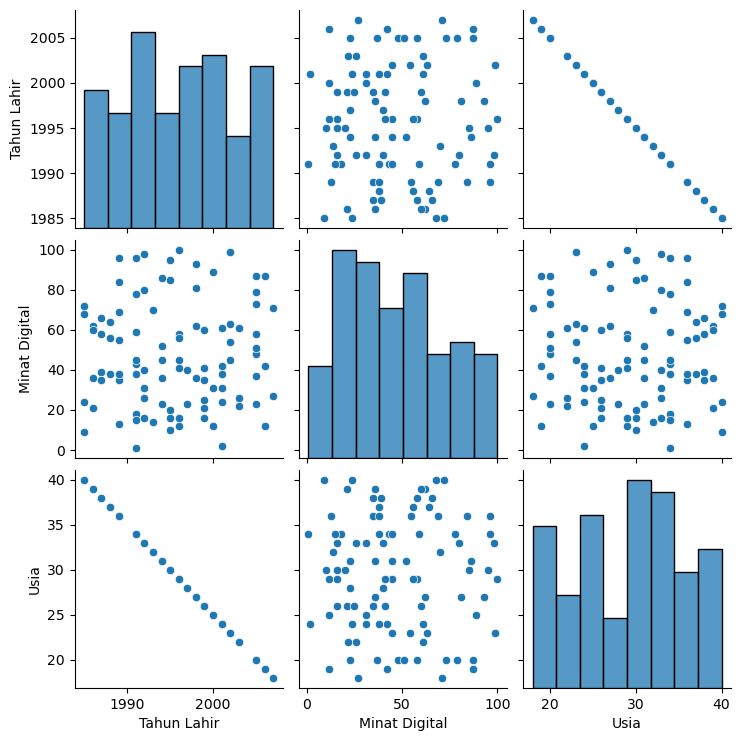

In [9]:
# pairplot, untuk melihat distribusi data secara menyeluruh 
df_num = df.select_dtypes(include='number')
sns.pairplot(df_num)
plt.show()

In [10]:
import scipy.stats as stats

data = df['Usia']
mean = np.mean(data)
sem = stats.sem(data)
ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
print(f"95% Confidence Interval: {ci}")


95% Confidence Interval: (28.034027256671905, 30.545972743328093)


In [11]:
df.to_csv('data_final.csv', sep=';')